
## Data set description: 
    This dataset records some main Facebook metrics such as likes, checkins, or talking about counts over a 2.5 years period of over 3.6 millions different businesses.
    By analyzing Facebook ‘check in’ data, Investment Bank Cowen used this data to track foot traffic to Chipotle starting in 2017, and thus predict falls in Chipotle stock performance as well. This metric of analyzing footfall became a staple for fast food restaurant research analysts as discussed by Yahoo Finance article.


## Project's goal:
    Analyze Facebook's metrics as indication for actual footfall of top restaurant businesses in the country. Who are the winners in attracting customers to physical locations? For restaurant businesses, especially  fastfood that do not offer delivery, footfall is crucial to sales revenue. Those who can attract customers into their stores will more likely to be financially successful.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('temp_datalab_records_social_facebook.csv', low_memory=False)

In [3]:
df.shape

(3621391, 14)

In [4]:
df.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [5]:
df_short = df.iloc[:, :-3]    # We take out the last 3 columns since they contain only Null values
df_short = df_short[(df_short['were_here_count'] > 0) & (df_short['checkins'] > 0)]
df_short.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated
6,53146,2015-01-01 05:00:00+00,UMBBank,173,f,173,6549,58,211199048925162,NaN,2017-02-14 03:47:46.670674+00
12,52880,2015-01-01 05:00:00+00,imagesensingsys,2,f,2,44,1,258838584186336,NaN,2017-02-14 02:48:58.269663+00
16,52692,2015-01-01 05:00:00+00,ChicopeeSavings,5,f,5,1085,66,186884128163522,NaN,2017-02-14 03:53:21.562903+00
19,53502,2015-01-01 05:00:00+00,servicenow,758,f,758,4570,184,70876467572,NaN,2017-02-14 06:57:57.472526+00
21,53612,2015-01-01 05:00:00+00,tripointehomes,21,f,21,676,24,186868411355494,NaN,2017-02-14 07:49:42.312818+00


In [6]:
df_short.time.unique()

array(['2015-01-01 05:00:00+00', '2015-01-03 05:00:00+00',
       '2015-01-04 05:00:00+00', ..., '2018-07-15 04:00:00+00',
       '2018-07-16 04:00:00+00', '2018-07-17 04:00:00+00'], dtype=object)

The provided dataset contains daily updated facebook metrics for businesses from 01-01-2015 till 07-17-2018. First, we want to analyze at the average metrics over this 3.5 years window to see overall, which restaurant businesses are the most successful at attracting customers into their stores.

Unfortunately, the provdided dataset do not track the category of each business. We will select only the top 10 - 15 restaurant businesses in the country for comparison, since it is not possible to get all of them in a reasonable time. This can be achieved by going through the top 25 businesses in each of the 4 average facebook metrics available and record down the restaurant businesses. 

In [7]:
df_average_metrics = df_short.groupby(['username']).mean()[['checkins', 'were_here_count', 'likes', 'talking_about_count']]
df_average_metrics.head()

,checkins,were_here_count,likes,talking_about_count
username,,,,
1019thewolf,962.256494,962.256494,43961.665584,13497.267316
1079mixfm,658.954128,658.954128,35224.094801,3179.454128
1st.Sec.Bank,342.017375,342.017375,1233.231660,49.059846
1stFederalBank,97.847195,97.847195,4041.235977,114.150870
1stGuard,1.503989,1.503989,830.526596,5.178191


In [8]:
df_average_metrics.sort_values('checkins', ascending=False).head(25)

,checkins,were_here_count,likes,talking_about_count
username,,,,
Disneyland,1.588837e+07,1.589827e+07,1.786445e+07,145376.203354
WaltDisneyWorld,6.113232e+06,6.211543e+06,1.628757e+07,177440.653361
DisneylandParisfr,4.307778e+06,5.658716e+06,4.028984e+06,59885.216561
disneylandparis,4.021268e+06,5.957419e+06,3.789434e+06,162704.178571
TheGarden,3.484200e+06,3.484200e+06,6.419668e+05,12600.229642
MadisonSquareGarden,2.964063e+06,2.964063e+06,5.825753e+05,24749.312292
empirestatebuilding,2.583124e+06,2.583124e+06,9.445165e+05,29404.071287
KnottsBerryFarm,2.281984e+06,2.281984e+06,5.378719e+05,19368.389734
SeaWorld,2.227823e+06,2.459638e+06,1.678960e+06,38666.460878


Looking at businesses with top checkins, we do not see many restaurant businesses. This is expected because people tend to checkin more at landscape/tourism destinations. Let's move on to the next facebook metric. 

In [10]:
df_average_metrics.sort_values('were_here_count', ascending=False).head(25)

,checkins,were_here_count,likes,talking_about_count
username,,,,
McDonaldsUS,1.260546e+01,2.568079e+07,6.968138e+07,61928.700546
applebees,1.000000e+00,2.257022e+07,6.114221e+06,46550.281857
cinemark,2.026373e+04,1.737954e+07,1.281302e+06,13644.310948
hilton,4.644624e+04,1.685121e+07,1.598590e+06,24389.457143
Disneyland,1.588837e+07,1.589827e+07,1.786445e+07,145376.203354
texasroadhouse,5.761510e+00,1.505172e+07,2.627884e+06,12681.944751
walmart,1.384329e+04,1.492335e+07,3.322463e+07,125494.788525
crackerbarrel,1.346367e+05,1.035272e+07,2.843805e+06,40659.511895
txrhTuscaloosaAL,7.000000e+00,9.790318e+06,2.609308e+06,9969.300000


McDonaldsUS, applebees, texasroadhouse, crackerbarrel, dennys, outback, RedRobin, hooters, PizzaHut, chipotle are the restaurant businesses with the most facebook checkins.

In [11]:
df_average_metrics.sort_values('likes', ascending=False).head(25)

,checkins,were_here_count,likes,talking_about_count
username,,,,
facebook,1.200000e+01,8.829465e+04,1.948838e+08,3.792024e+05
manchesterunited,1.610693e+04,2.030071e+06,7.051998e+07,1.624143e+06
McDonaldsUS,1.260546e+01,2.568079e+07,6.968138e+07,6.192870e+04
KFC,2.086855e+05,1.710122e+06,4.488204e+07,3.594585e+04
walmart,1.384329e+04,1.492335e+07,3.322463e+07,1.254948e+05
PizzaHut,2.700176e+00,5.512641e+06,3.016544e+07,4.309256e+03
nike,8.674371e+04,1.127839e+05,2.617868e+07,1.509476e+05
Google,4.165255e+05,2.321777e+02,2.562624e+07,1.090896e+05
target,1.000000e+00,3.215851e+06,2.363213e+07,1.384818e+05


McDonaldsUS, KFC, PizzaHut, DunkinDonuts, tacobell are the restaurant businesses with the most facebook likes.

In [12]:
df_average_metrics.sort_values('talking_about_count', ascending=False).head(25)

,checkins,were_here_count,likes,talking_about_count
username,,,,
manchesterunited,1.610693e+04,2.030071e+06,7.051998e+07,1.624143e+06
facebook,1.200000e+01,8.829465e+04,1.948838e+08,3.792024e+05
Nordstrom,1.000000e+00,1.143725e+06,4.322770e+06,1.879500e+05
tricolor1035,1.119587e+03,1.119587e+03,4.684213e+05,1.860001e+05
Fox59News,1.101150e+03,1.101150e+03,7.441879e+05,1.778970e+05
WaltDisneyWorld,6.113232e+06,6.211543e+06,1.628757e+07,1.774407e+05
disneylandparis,4.021268e+06,5.957419e+06,3.789434e+06,1.627042e+05
KPRC2,4.555556e+00,4.555556e+00,7.327264e+05,1.589407e+05
nike,8.674371e+04,1.127839e+05,2.617868e+07,1.509476e+05


Looking at businesses with top talking about, we do not see many restaurant businesses.

So, we have our list of top restaurants in terms of facebook metrics to analyze. They are
- McDonaldsUS
- applebees
- texasroadhouse
- crackerbarrel
- dennys
- outback
- RedRobin
- hooters
- PizzaHut
- chipotle
- KFC
- DunkinDonuts
- tacobell

In [13]:
df_top_restaurant = df_short[df_short.username.isin(['McDonaldsUS', 'applebees', 'texasroadhouse',
                                                     'crackerbarrel', 'dennys', 'outback',
                                                     'RedRobin', 'hooters', 'PizzaHut',
                                                     'chipotle', 'KFC', 'DunkinDonuts', 'tacobell'])]
df_top_restaurant_metrics = df_top_restaurant[['username', 'checkins', 'were_here_count', 'likes', 'talking_about_count']]
df_top_restaurant_metrics.groupby('username').describe().transpose()

username                   DunkinDonuts           KFC   McDonaldsUS  \
checkins            count  9.120000e+02  9.130000e+02  9.150000e+02   
                    mean   3.000000e+00  2.086855e+05  1.260546e+01   
                    std    0.000000e+00  4.486189e+03  5.277555e-01   
                    min    3.000000e+00  2.006750e+05  1.200000e+01   
                    25%    3.000000e+00  2.050730e+05  1.200000e+01   
                    50%    3.000000e+00  2.080420e+05  1.300000e+01   
                    75%    3.000000e+00  2.120910e+05  1.300000e+01   
                    max    3.000000e+00  2.185730e+05  1.400000e+01   
were_here_count     count  9.120000e+02  9.130000e+02  9.150000e+02   
                    mean   2.082070e+06  1.710122e+06  2.568079e+07   
                    std    4.702027e+05  7.548573e+05  3.353826e+06   
                    min    1.315445e+06  8.425770e+05  2.070066e+07   
                    25%    1.666190e+06  1.061573e+06  2.286326e+07   
                    50%    2.039892e+06  1.425617e+06  2.489121e+07   
                    75%    2.510747e+06  2.313699e+06  2.879546e+07   
                    max    2.879482e+06  3.561142e+06  3.193979e+07   
likes               count  9.120000e+02  9.130000e+02  9.150000e+02   
                    mean   1.417024e+07  4.488204e+07  6.968138e+07   
                    std    7.747558e+05  3.514275e+06  4.907152e+06   
                    min    1.291117e+07  3.943911e+07  6.078886e+07   
                    25%    1.344348e+07  4.183996e+07  6.608423e+07   
                    50%    1.405492e+07  4.425352e+07  6.936679e+07   
                    75%    1.493075e+07  4.814653e+07  7.400836e+07   
                    max    1.535637e+07  5.163574e+07  7.801558e+07   
talking_about_count count  9.120000e+02  9.130000e+02  9.150000e+02   
                    mean   2.363925e+03  3.594585e+04  6.192870e+04   
                    std    3.801600e+03  2.991797e+04  4.290634e+04   
                    min    7.600000e+01  7.240000e+02  3.019000e+03   
                    25%    1.551500e+03  1.620700e+04  3.728750e+04   
                    50%    1.803000e+03  2.542100e+04  5.226500e+04   
                    75%    2.244000e+03  4.251100e+04  7.331350e+04   
                    max    4.581900e+04  2.057230e+05  3.405560e+05   

username                       PizzaHut      RedRobin     applebees  \
checkins            count  5.670000e+02  1.222000e+03  9.260000e+02   
                    mean   2.700176e+00  4.111296e+04  1.000000e+00   
                    std    7.146004e-01  1.238401e+03  0.000000e+00   
                    min    1.000000e+00  3.378900e+04  1.000000e+00   
                    25%    3.000000e+00  4.114900e+04  1.000000e+00   
                    50%    3.000000e+00  4.142800e+04  1.000000e+00   
                    75%    3.000000e+00  4.176575e+04  1.000000e+00   
                    max    3.000000e+00  4.210900e+04  1.000000e+00   
were_here_count     count  5.670000e+02  1.222000e+03  9.260000e+02   
                    mean   5.512641e+06  8.251977e+06  2.257022e+07   
                    std    5.047430e+05  1.472183e+06  2.673283e+06   
                    min    4.581543e+06  5.392209e+06  1.738672e+07   
                    25%    5.089176e+06  6.969596e+06  2.037984e+07   
                    50%    5.566857e+06  8.365014e+06  2.288264e+07   
                    75%    5.954505e+06  9.606973e+06  2.488735e+07   
                    max    6.391320e+06  1.055325e+07  2.675127e+07   
likes               count  5.670000e+02  1.222000e+03  9.260000e+02   
                    mean   3.016544e+07  1.462198e+06  6.114221e+06   
                    std    9.520054e+05  4.944052e+04  8.509964e+04   
                    min    2.855276e+07  1.372383e+06  5.938101e+06   
                    25%    2.929972e+07  1.415296e+06  6.053059e+06   
                    50%    3.035356e+07  1.476514e+06  6.144465e+06   
                    75%

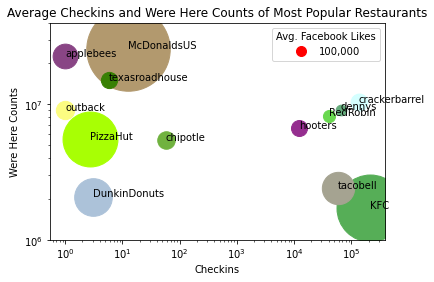

In [14]:
df_average_metrics_restaurant = df_top_restaurant_metrics.groupby('username').mean()

from matplotlib import colors
colors = list(colors.ColorConverter.colors.keys())

fig, ax = plt.subplots()
plt.yscale('log')
plt.ylim([1e6, 4e7])
plt.xscale('log')
plt.xlabel('Checkins')
plt.ylabel('Were Here Counts')
plt.title('Average Checkins and Were Here Counts of Most Popular Restaurants')
n = 0
for i, row in df_average_metrics_restaurant.iterrows():
    sc = ax.scatter(row['checkins'], row['were_here_count'],
                     s=row['likes']/10000, color=colors[n])
    ax.annotate(i, (row['checkins'], row['were_here_count']))
    n += 1

    
#Maker Size for Legend
msizes = np.array([10])
l1, = plt.plot([],[], 'or', markersize=msizes[0])
labels = ['100,000']
legend = plt.legend([l1], labels, frameon=True, title='Avg. Facebook Likes', scatterpoints = 1)

## Interpretation: 
- Dunkin Donuts, Chipotle, Hooters, Red Robin, Dennys, Cracker Barrel metrics show quite a consistent log-log relationship between number of checkins and were here counts.
- Taco Bell and KFC both have very high checkins but low were here counts. Since they are both owned and opperated by the same group, and often opened right next to one another, this is quite interesting to see. Perhaps the franchise owner ran special promotions to incentivise facebook checkins.
- Cracker Barrel, Outback, Texas Roadhouse, Applebees, and McDonald seem to be generally doing very well in terms of attracting customers to their physical locations. This is because they have very were here counts, which might be more accurate than checkins to represent actual footfall. This is especially true for fastfood establishments because people go there for a quick bite, in and out in maters of minutes and they are less lik"ely to checkin.
- From the metrics averages, **Cracker Barrel, Outback, Texas Roadhouse, and Applebees** are the winners at attracting customers to physical locations. This is because although they are smaller in scale of opperation (evident by the relatively modest number of Facebook likes), they still manage to amass impressive number of were here counts. Furthermore, people on average spend more money at these establishments than at fastfood chains like McDonalds, so they would profit more just by being able to keep up with McDonalds or other fastfood chains in terms of footfall. 


Analyzing average metrics might not show the full picture since it doesn't take into account their variations with time. Thus, we want to also take a look at the standard deviation of these Facebook metrics to see if these averages are skewed by temporary spikes (mostlily due to seasonal promotions).

Since we've established that were here counts appear to be the more accurate representation of actual footfall, let's take a closer look at both the average and standard deviation of this metric for all restaurants of interest.

In [15]:
df_were_here_count_restaurant = pd.concat([df_top_restaurant_metrics.groupby('username').mean()['were_here_count'],
                                           df_top_restaurant_metrics.groupby('username').std()['were_here_count']],
                                          axis=1)
df_were_here_count_restaurant.columns = ['Mean', 'Stv']                                
df_were_here_count_restaurant['Coef_Variation'] = df_were_here_count_restaurant['Stv'] / df_were_here_count_restaurant['Mean']
df_were_here_count_restaurant.sort_values('Coef_Variation', ascending=False)

,Mean,Stv,Coef_Variation
username,,,
KFC,1.710122e+06,7.548573e+05,0.441406
dennys,9.097295e+06,2.571208e+06,0.282634
crackerbarrel,1.035272e+07,2.556237e+06,0.246914
DunkinDonuts,2.082070e+06,4.702027e+05,0.225834
texasroadhouse,1.505172e+07,3.368397e+06,0.223788
RedRobin,8.251977e+06,1.472183e+06,0.178404
tacobell,2.408301e+06,3.998213e+05,0.166018
McDonaldsUS,2.568079e+07,3.353826e+06,0.130597
outback,9.075830e+06,1.129142e+06,0.124412


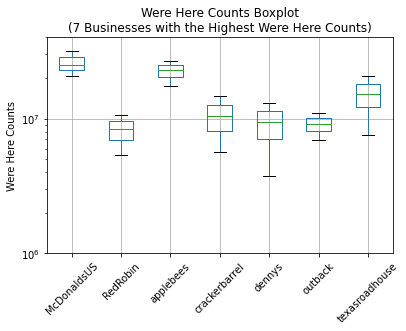

In [16]:
companies_list = list(df_average_metrics_restaurant.sort_values('were_here_count', ascending=False)[:7].index)
box_plot_df = df_top_restaurant_metrics[['username', 'were_here_count']]
box_plot_df = box_plot_df[box_plot_df.username.isin(companies_list)]

box_plot_df.boxplot(column='were_here_count',by='username')
plt.suptitle('')
plt.yscale('log')
plt.ylim([1e6, 4e7])
plt.ylabel('Were Here Counts')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Were Here Counts Boxplot\n(7 Businesses with the Highest Were Here Counts)')
plt.show()

Coefficients of variation for Facebook were here counts range from 5% to 44%, with most fall below the 22% threshold.
Among our picks from the winners in mean were here count (Cracker Barrel, Outback, Texas Roadhouse, Applebees, and McDonald), Outback, Applebees, and McDonald also have low coefficient of variation in this metric.

<h2>Conclusions:</h2>

The apparent winner(s) in attracting customers to their physical location, based on this Facebook metrics analysis, are **Outback, and Applebees**. This is because:
- They have very high number of were here counts, especially given their sizes as indicated by their amount of Facebook likes
- Their were here count also have low coefficient of variation, indicating that their stream of customers are stable throughout the 2.5 years period.
- Their businesses profit more, on average, per customer than those in the fastfood chain category.